## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import missingno as msno

import math


**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [2]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [4]:
data = data.drop(labels=['Id'], axis=1)
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

<Axes: >

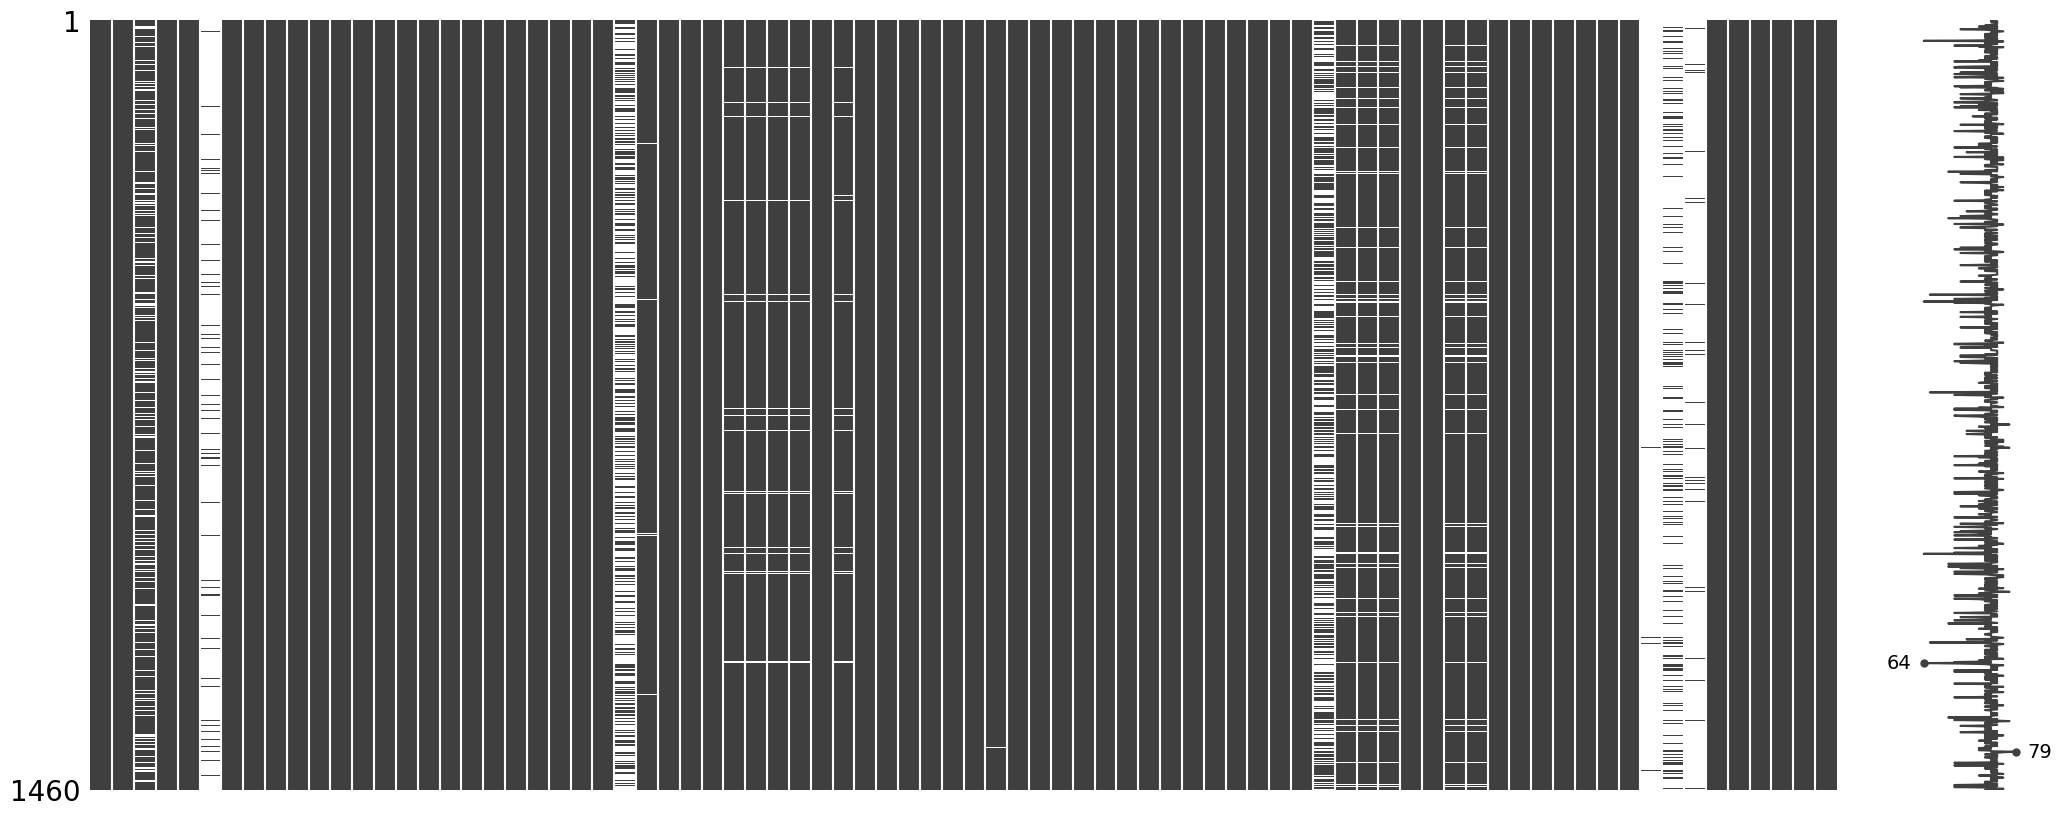

In [5]:
msno.matrix(data)

In [6]:
# смотрим на количество пропущенных значений
data.isnull().sum()[data.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
data.shape

(1460, 80)

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

* Уберем Alley, PoolQC, Fence, MiscFeature - так как очень много пропуском, не будут информативны;

In [8]:
data = data.drop(labels=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


In [9]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object


Пропуски в категориальных признаках заполним самым часто встречающимся объектом, а в вещественных - средним (позже попробуем и медианой)

In [10]:
category_features = data.select_dtypes('object').columns
continuous_features = data.select_dtypes('float64').columns

continuous_features

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [11]:
for feature in category_features:
    most_common = data[feature].describe()['top']
    data[feature] = data[feature].fillna(most_common)

for feature in continuous_features:
    mean = data[feature].mean()
    data[feature] = data[feature].fillna(mean)

✅ Проверьте, что вы действительно избавились от пропусков

<Axes: >

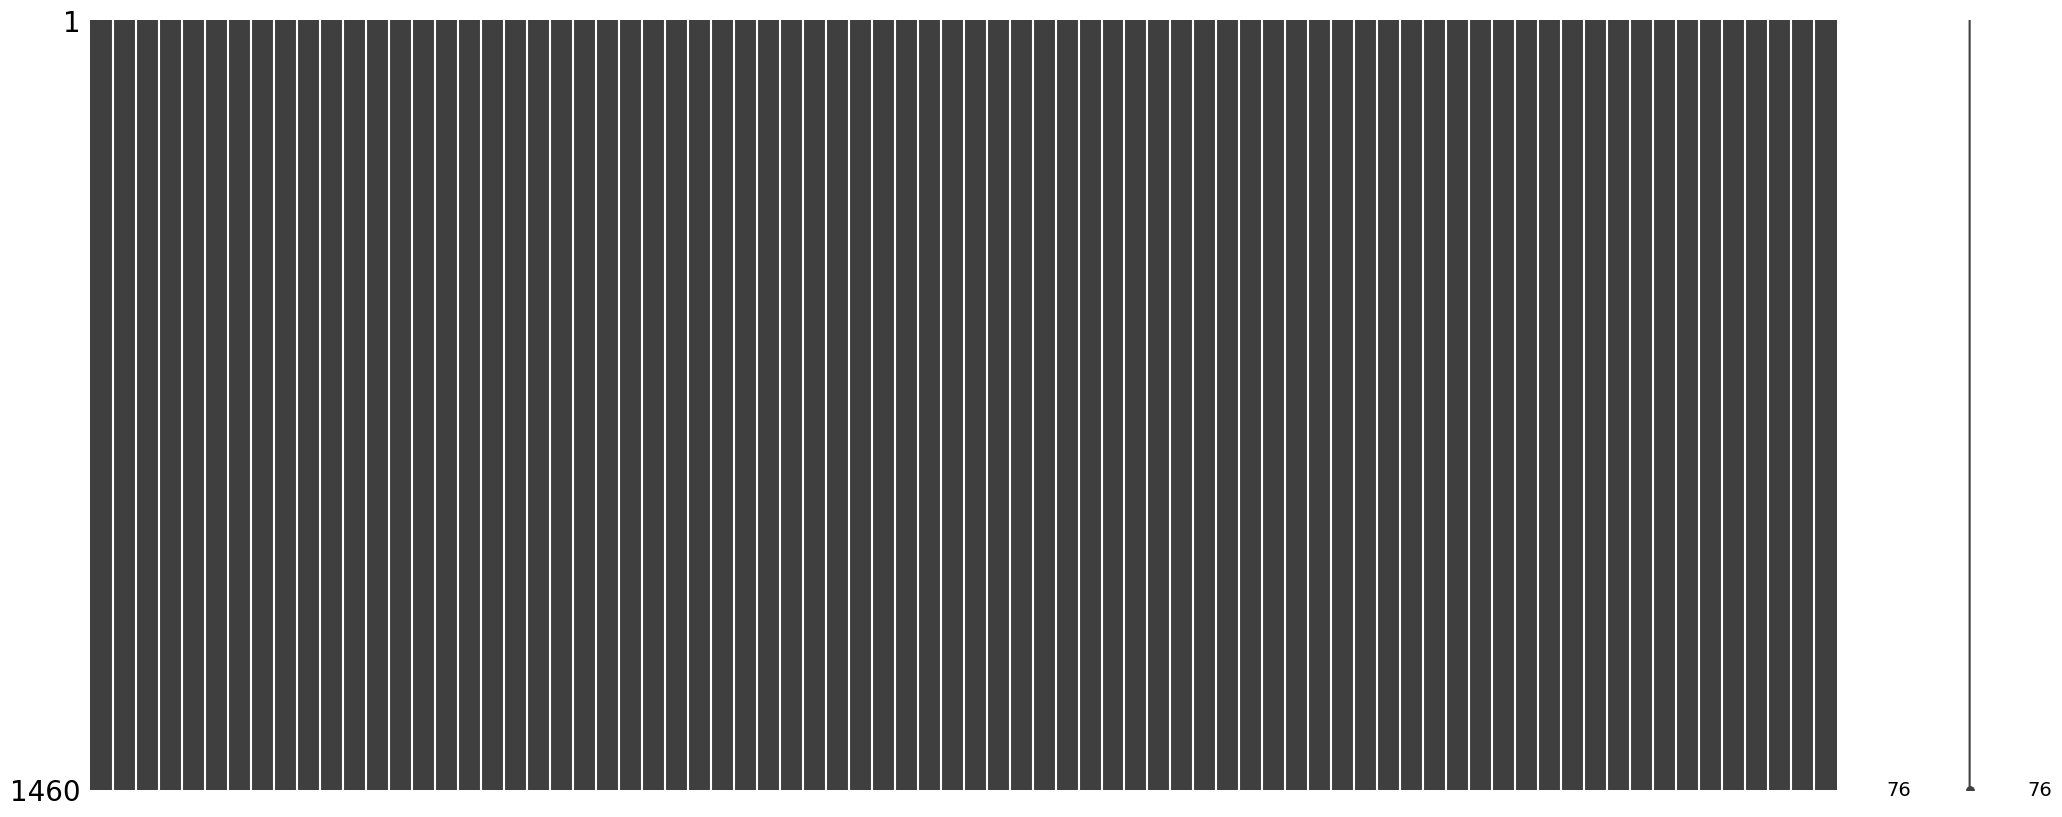

In [12]:
msno.matrix(data)


✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

* label encoding используем тогда, когда признаков мало (бинарный и тд.)
* ohe - в остальных случаях, пока не изучим усложненные методы

In [13]:
data_coded = data.copy()

Определим, сколько категорий в каждом признаке

In [14]:
category_features_count = {}
for feature in category_features:
    category_features_count[feature] = data[feature].nunique()

category_features_count = dict(sorted(category_features_count.items(), key=lambda x: x[1], reverse=True))

category_features_count

{'Neighborhood': 25,
 'Exterior2nd': 16,
 'Exterior1st': 15,
 'Condition1': 9,
 'SaleType': 9,
 'Condition2': 8,
 'HouseStyle': 8,
 'RoofMatl': 8,
 'Functional': 7,
 'RoofStyle': 6,
 'Foundation': 6,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'GarageType': 6,
 'SaleCondition': 6,
 'MSZoning': 5,
 'LotConfig': 5,
 'BldgType': 5,
 'ExterCond': 5,
 'HeatingQC': 5,
 'Electrical': 5,
 'FireplaceQu': 5,
 'GarageQual': 5,
 'GarageCond': 5,
 'LotShape': 4,
 'LandContour': 4,
 'ExterQual': 4,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'KitchenQual': 4,
 'LandSlope': 3,
 'MasVnrType': 3,
 'GarageFinish': 3,
 'PavedDrive': 3,
 'Street': 2,
 'Utilities': 2,
 'CentralAir': 2}

Закодируем бинарные признаки через label, а остальные - ohe

In [15]:
one_hot_features = []
label_features = []
for feature in category_features_count:
    if category_features_count[feature] > 2:
        one_hot_features.append(feature)
    else:
        label_features.append(feature)

In [16]:
for feature in label_features:
    le = LabelEncoder()
    data_coded[feature] = le.fit_transform(data_coded[feature])

data_coded = pd.get_dummies(data_coded, columns=one_hot_features, drop_first=True, dtype=int)

data_coded

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,KitchenQual_Gd,KitchenQual_TA,LandSlope_Mod,LandSlope_Sev,MasVnrType_BrkFace,MasVnrType_Stone,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,1,0,0,0,1,0,1,0,0,1
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,0,1,0,0,1,0,1,0,0,1
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,1,0,0,0,1,0,1,0,0,1
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,1,0,0,0,1,0,0,1,0,1
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1,0,6,5,1999,2000,0.0,...,0,1,0,0,1,0,1,0,0,1
1456,20,85.0,13175,1,0,6,6,1978,1988,119.0,...,0,1,0,0,0,1,0,1,0,1
1457,70,66.0,9042,1,0,7,9,1941,2006,0.0,...,1,0,0,0,1,0,1,0,0,1
1458,20,68.0,9717,1,0,5,6,1950,1996,0.0,...,1,0,0,0,1,0,0,1,0,1


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [17]:
data_corr = data.drop(category_features, axis=1).corr()
data_corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


<Axes: >

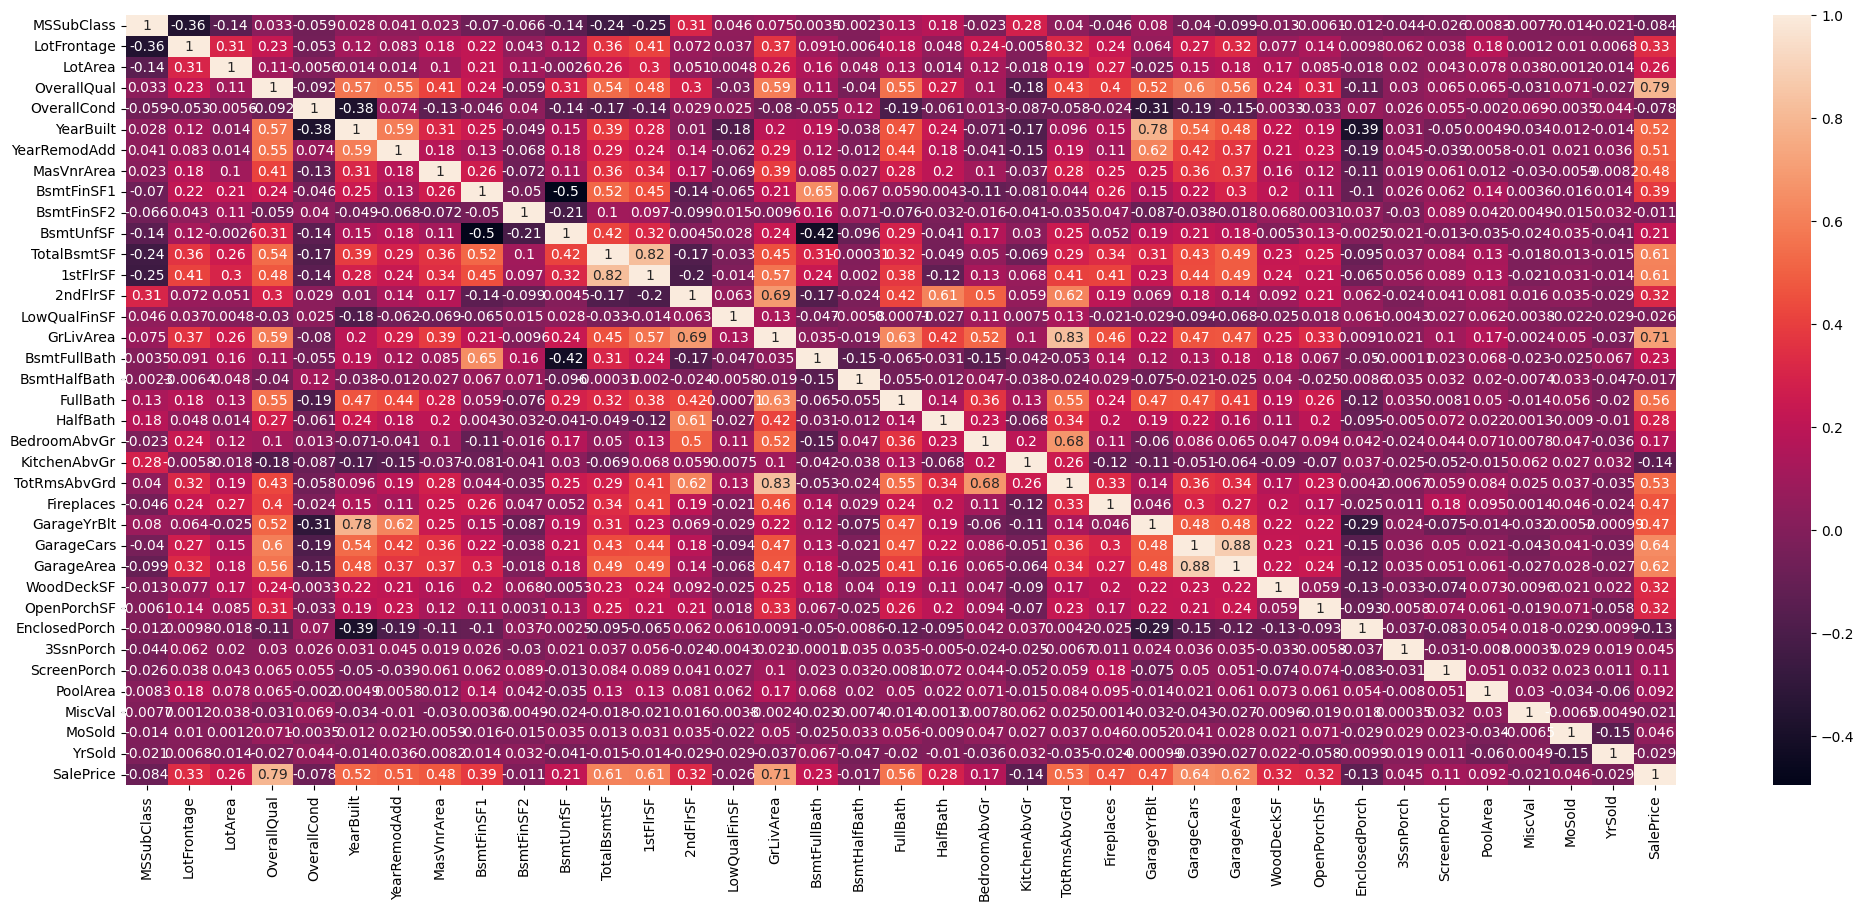

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(data_corr, linewidths = 0.001, annot=True)

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [19]:
data_corr = data_corr.abs()

sol = (data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False))

features = []
corr = []

features = []
corr = []

for index, value in sol.items():
    if(index[1] == 'SalePrice'):
        print(index[0],':', value)
        features.append(index[0])
        corr.append(value)



OverallQual : 0.7909816005838054
GrLivArea : 0.7086244776126518
GarageCars : 0.6404091972583521
GarageArea : 0.6234314389183621
TotalBsmtSF : 0.613580551559194
1stFlrSF : 0.6058521846919154
FullBath : 0.5606637627484453
TotRmsAbvGrd : 0.5337231555820283
YearBuilt : 0.5228973328794969
YearRemodAdd : 0.5071009671113867
MasVnrArea : 0.475241316773666
GarageYrBlt : 0.4701774537404816
Fireplaces : 0.46692883675152763
BsmtFinSF1 : 0.3864198062421535
LotFrontage : 0.33490085154055127
WoodDeckSF : 0.32441344456812926
2ndFlrSF : 0.31933380283206736
OpenPorchSF : 0.31585622711605504
HalfBath : 0.2841076755947826
LotArea : 0.26384335387140495
BsmtFullBath : 0.22712223313149413
BsmtUnfSF : 0.21447910554696925
BedroomAbvGr : 0.1682131543007396
KitchenAbvGr : 0.1359073708421411
EnclosedPorch : 0.12857795792595655
ScreenPorch : 0.11144657114291114
PoolArea : 0.09240354949187321
MSSubClass : 0.08428413512659509
OverallCond : 0.07785589404867795
MoSold : 0.046432245223819474
3SsnPorch : 0.0445836653357

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


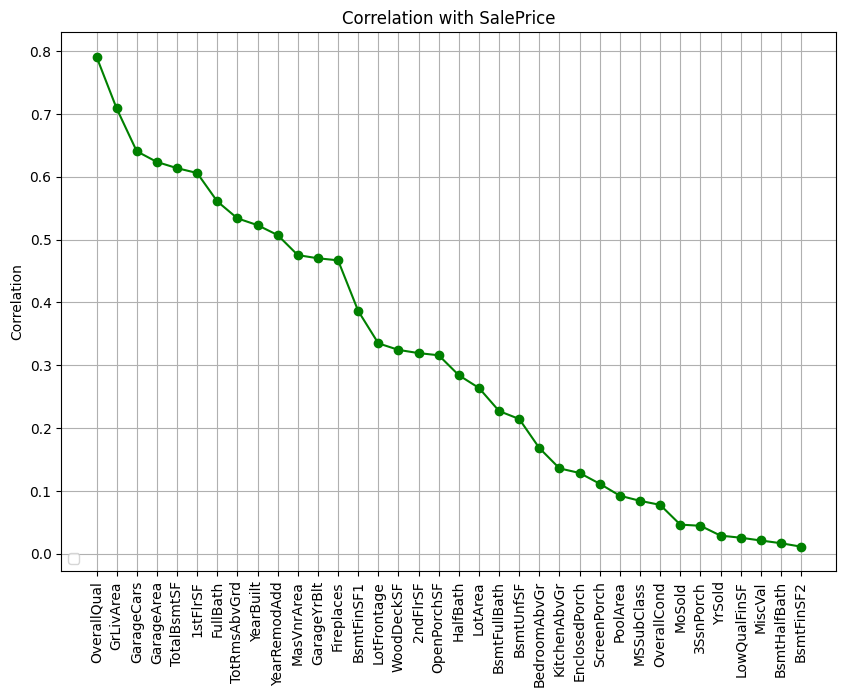

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

x = corr
y = features

ax.plot(y, x, marker='o', linestyle='-', color='g')
plt.xticks(rotation=90)

ax.grid(True)
ax.set_ylabel('Correlation')
ax.set_title('Correlation with SalePrice')

leg = ax.legend(loc='lower left')


In [21]:
features[0]

'OverallQual'

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

Text(0.5, 1.0, 'SalePrice distribution')

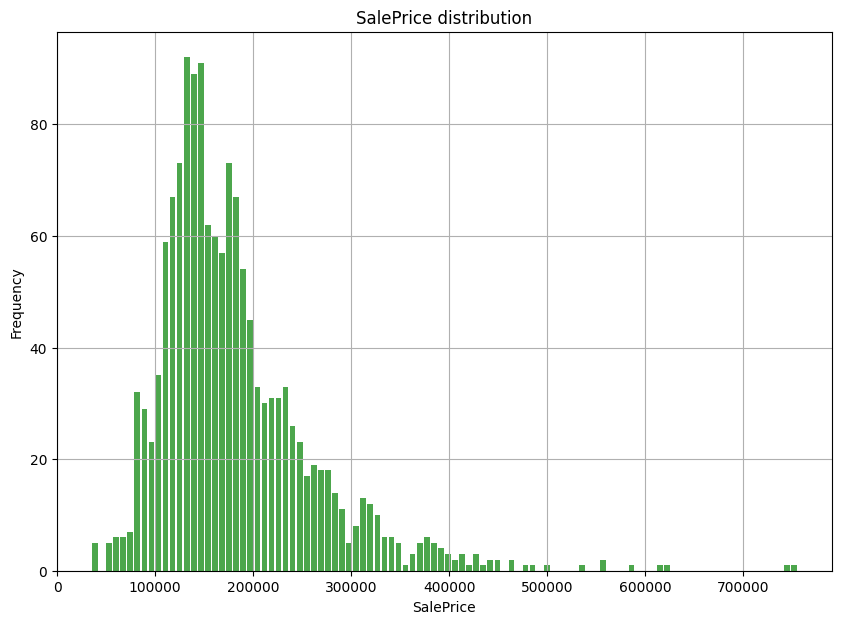

In [22]:
target = data_coded['SalePrice']

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(target, bins=100, color='g', alpha=0.7, rwidth=0.8)
ax.grid(True)
ax.set_ylabel('Frequency')
ax.set_xlabel('SalePrice')
ax.set_title('SalePrice distribution')


Text(0.5, 1.0, 'SalePrice distribution')

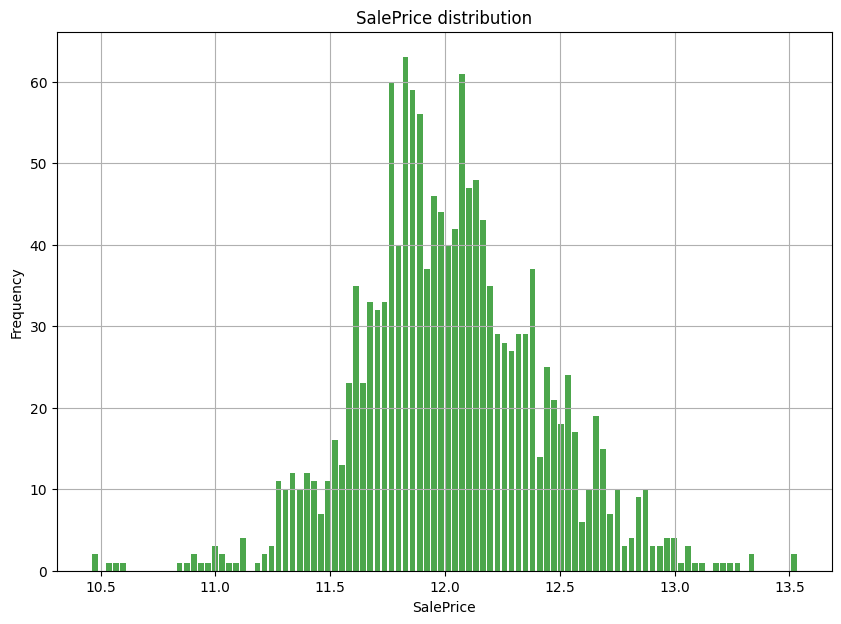

In [23]:
target_log1p = np.log1p(target)
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(target_log1p, bins=100, color='g', alpha=0.7, rwidth=0.8)
ax.grid(True)
ax.set_ylabel('Frequency')
ax.set_xlabel('SalePrice')
ax.set_title('SalePrice distribution')

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_coded.drop(labels=['SalePrice'], axis=1), target_log1p, test_size=0.25, random_state=13)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

## Линейная регрессия

In [25]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print('MSE train:', mean_squared_error(math.e**(y_train)-1, math.e**(linear_regressor.predict(X_train))-1))
print('MSE test:', mean_squared_error(math.e**(y_test)-1, math.e**(linear_regressor.predict(X_test))-1))

MSE train: 232817026.58366042
MSE test: 21343492896.006184


In [27]:
print('MAE train:', mean_absolute_error(math.e**(y_train)-1, math.e**(linear_regressor.predict(X_train))-1))
print('MAE test:', mean_absolute_error(math.e**(y_test)-1, math.e**(linear_regressor.predict(X_test))-1))

MAE train: 10690.20277304402
MAE test: 25050.895486241938


In [28]:
print('R2 train:', r2_score(math.e**(y_train)-1, math.e**(linear_regressor.predict(X_train))-1))
print('R2 test:', r2_score(math.e**(y_test)-1, math.e**(linear_regressor.predict(X_test))-1))

R2 train: 0.9624288660384209
R2 test: -2.2235202849643616


In [29]:
coef_linear_regressor = pd.DataFrame(linear_regressor.coef_, index = data_coded.drop(labels=['SalePrice'], axis=1).columns, columns=['coef'])
coef_linear_regressor.sort_values(by=['coef'])

,coef
Exterior1st_BrkComm,-0.433864
SaleCondition_Partial,-0.289805
Functional_Maj2,-0.202017
Utilities,-0.197553
LandSlope_Sev,-0.186367
...,...
MSZoning_RM,0.312555
BsmtCond_Po,0.312874
MSZoning_RL,0.349758
MSZoning_FV,0.351987


## Ridge

In [30]:
ridge_regressor = linear_model.Ridge()
ridge_regressor.fit(X_train, y_train)

Ridge()

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.